In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from matplotlib import pyplot

In [5]:
ap = pd.read_csv("E:/Black-Friday-Sale-Analysis--master/Blackfriday.csv")
ap.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [32]:
ap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [33]:
ap.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [35]:
ap.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [36]:
ap.sort_values('User_ID').head(10)
ap['User_ID'].value_counts().count() 

5891

In [41]:
ap['Gender'].unique()

array(['F', 'M'], dtype=object)

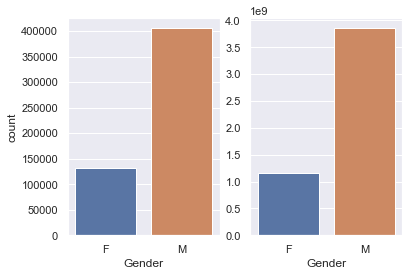

In [42]:
plt.subplot(1,2,1)
sns.countplot(ap['Gender']) #attendance

m_purchase = ap.groupby(['Gender'])['Purchase'].sum()
plt.subplot(1,2,2)
sns.barplot(m_purchase.index, m_purchase.values) #dollar value

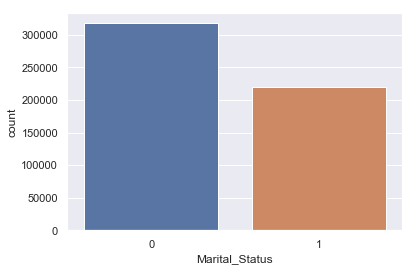

In [43]:
sns.countplot(ap['Marital_Status'])

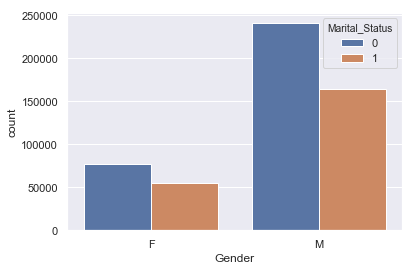

In [44]:
sns.countplot(ap['Gender'], hue = ap['Marital_Status'])

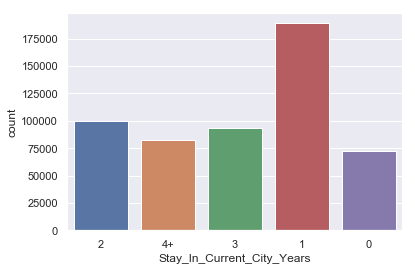

In [45]:
sns.countplot(ap['Stay_In_Current_City_Years'])

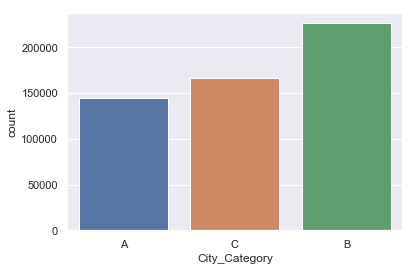

In [46]:
sns.countplot(ap['City_Category'])

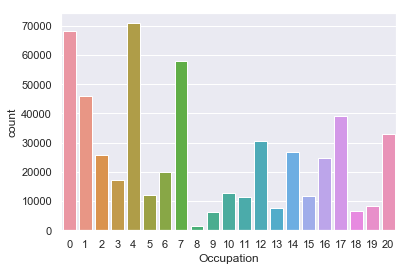

In [47]:
sns.countplot(ap['Occupation'])

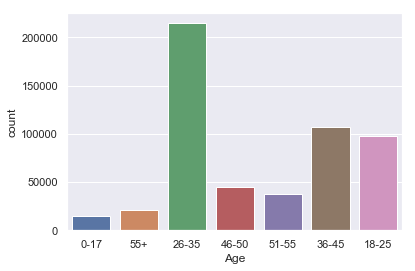

In [48]:
sns.countplot(ap['Age'])

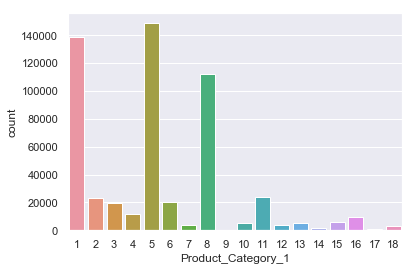

In [49]:
sns.countplot(ap['Product_Category_1'])

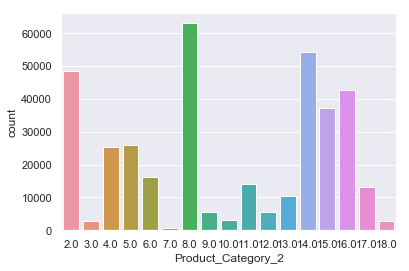

In [50]:
sns.countplot(ap['Product_Category_2'])

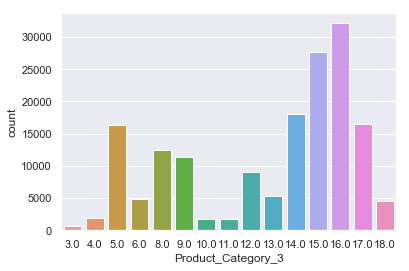

In [51]:
sns.countplot(ap['Product_Category_3'])

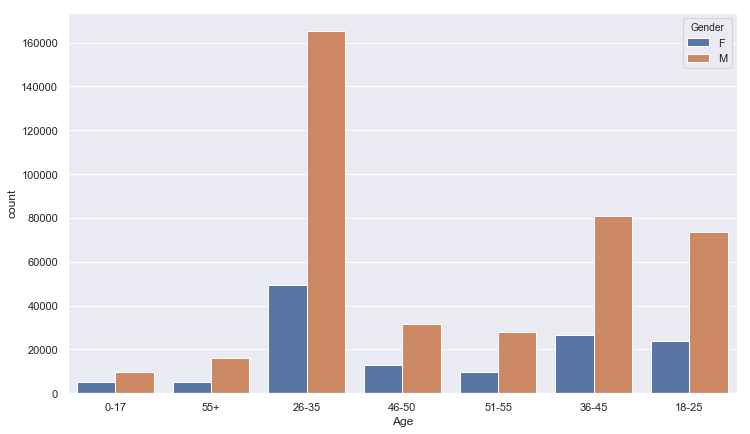

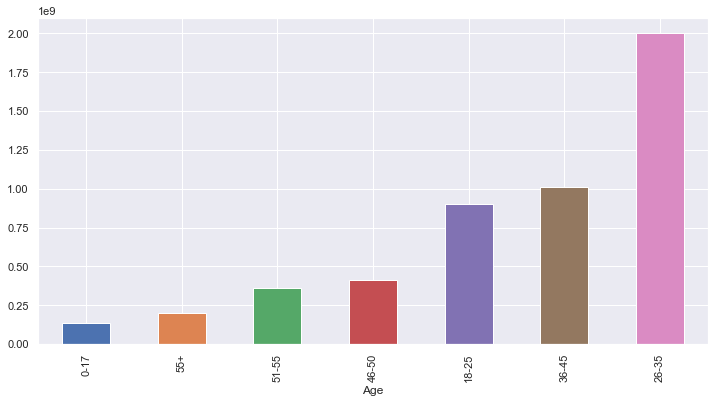

In [52]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(ap['Age'],hue=ap['Gender'])

def plot(group,column,plot):
    ax=plt.figure(figsize=(12,6))
    ap.groupby(group)[column].sum().sort_values().plot(plot)
plot('Age','Purchase','bar')

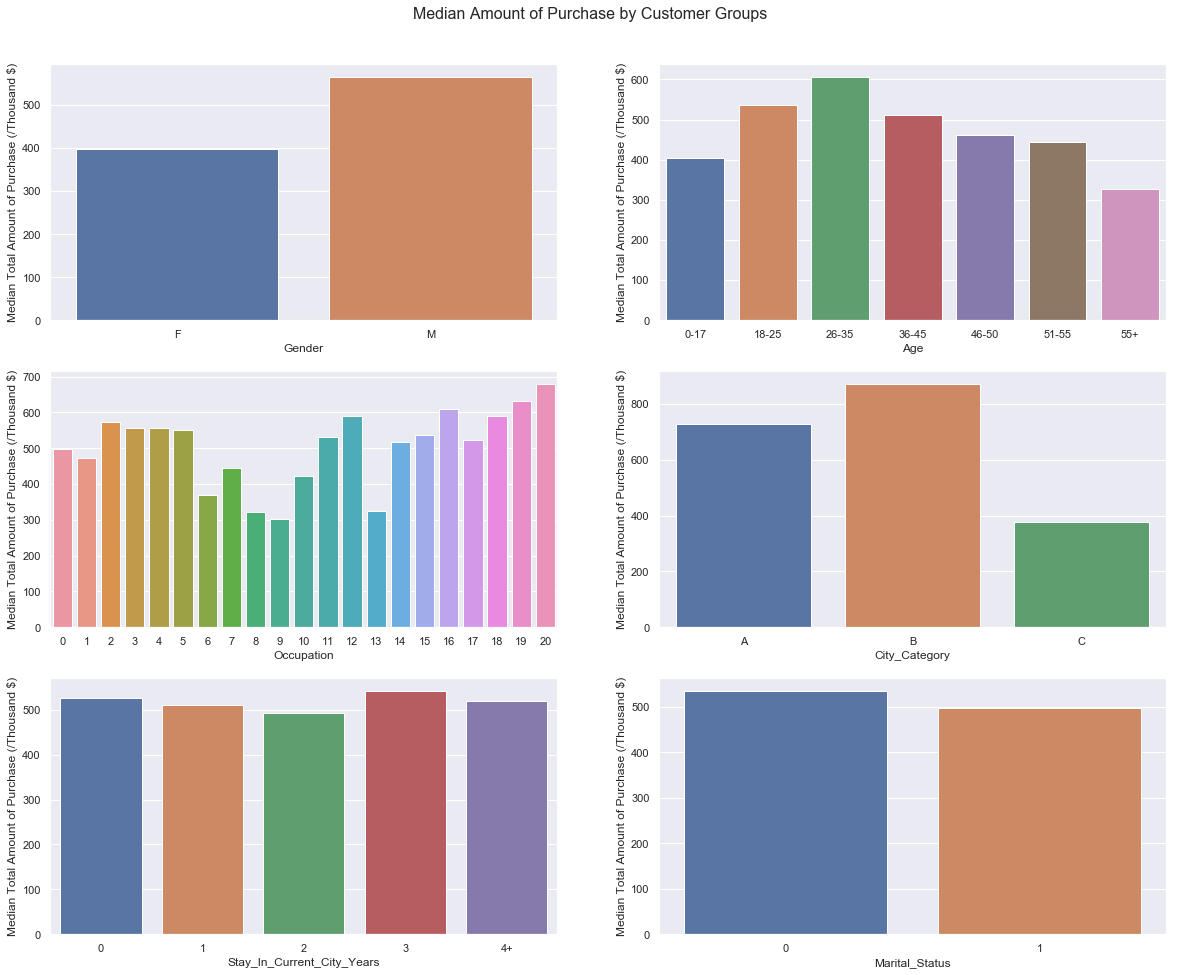

In [70]:
# Bar charts - show median instead of mean of total amount of purchase by each characteristic
import numpy as np
fig5, axes = plt.subplots(3,2,figsize=(20,16))

fig5.suptitle('Median Amount of Purchase by Customer Groups', fontsize = 16, y = 0.93)

sns.barplot(x='Gender', y='Tot_Purchase', data = ap_customer, estimator = np.median, ci = None, ax = axes[0][0])
sns.barplot(x='Age', y='Tot_Purchase', data = ap_customer, estimator = np.median, ci = None, 
            ax = axes[0][1], order = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])
sns.barplot(x='Occupation', y='Tot_Purchase', data = ap_customer, estimator = np.median, ci = None, ax = axes[1][0])
sns.barplot(x='City_Category', y='Tot_Purchase', data = ap_customer, estimator = np.median, 
            ci = None, ax = axes[1][1], order = ('A', 'B', 'C'))
sns.barplot(x='Stay_In_Current_City_Years', y='Tot_Purchase', data = ap_customer, estimator = np.median, 
            ci = None, ax = axes[2][0], order = ('0', '1', '2', '3', '4+'))
sns.barplot(x='Marital_Status', y='Tot_Purchase', data = ap_customer, estimator = np.median, ci = None, ax = axes[2][1])

for ax in fig5.axes:
    plt.sca(ax)
    plt.ylabel('Median Total Amount of Purchase (/Thousand $)')
 
plt.savefig('fig5')